In [1]:
# Import Dependencies
import os
import numpy as np
import pandas as pd
import utils as utils
import matplotlib.pyplot as plt
import joblib

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# Preprocessing

In [2]:
# Import and read the data
df_raw = pd.read_csv("data/top_10000_1960-now.csv")
df_raw.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [3]:
# list columns for features and target
df_raw.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')

In [4]:
# Drop unnecessary columns
# All columns listed, comment out columns to keep.
df_data = df_raw.drop([#'Track URI',
                       #'Track Name',
                       'Artist URI(s)',
                       #'Artist Name(s)',
                       'Album URI',
                       'Album Name',
                       'Album Artist URI(s)',
                       'Album Artist Name(s)',
                       'Album Release Date',
                       'Album Image URL',
                       'Disc Number',
                       'Track Number',
                       'Track Duration (ms)',
                       'Track Preview URL',
                       'Explicit',
                       'Popularity',
                       'ISRC',
                       'Added By',
                       'Added At',
                       'Artist Genres',
                       #'Danceability',
                       #'Energy',
                       'Key',
                       'Loudness',
                       'Mode',
                       #'Speechiness',
                       #'Acousticness',
                       #'Instrumentalness',
                       #'Liveness',
                       #'Valence',
                       #'Tempo',
                       'Time Signature',
                       'Album Genres',
                       'Label',
                       'Copyrights'],
                       axis=1)

In [5]:
# Renaming columns to convention
df_data = df_data.rename(columns={
                   'Track URI': 'track_uri',
                   'Track Name': 'track_name',
                   'Artist Name(s)': 'artist',
                   'Danceability': 'danceability',
                   'Energy': 'energy',
                   'Speechiness': 'speechiness',
                   'Acousticness': 'acousticness',
                   'Instrumentalness': 'instrumentalness',
                   'Liveness': 'liveness',
                   'Valence': 'valence',
                   'Tempo': 'tempo'
       })

In [6]:
# removing duplicates
df_data = df_data.drop_duplicates(subset=None, keep='first', inplace=False)
# Dropping null columns
df_data = df_data.dropna(how="any")
# reset index
df_data['song_id'] = df_data.index
df_data = df_data.set_index('song_id')

df_data.head()

,track_uri,track_name,artist,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_id,,,,,,,,,,,
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,0.617,0.872,0.0480,0.0158,0.112000,0.4080,0.504,111.458
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,0.825,0.743,0.1490,0.0142,0.000021,0.2370,0.800,127.045
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,0.677,0.665,0.0305,0.5600,0.000001,0.3380,0.706,74.981
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,0.683,0.728,0.2590,0.5680,0.000051,0.0384,0.833,75.311
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,0.319,0.627,0.0687,0.6750,0.000073,0.2890,0.497,85.818


In [7]:
# Verifying name update and Reviewing datatypes for analysis
utils.eda(df_data)

<class 'pandas.core.frame.DataFrame'>
Index: 9948 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_uri         9948 non-null   object 
 1   track_name        9948 non-null   object 
 2   artist            9948 non-null   object 
 3   danceability      9948 non-null   float64
 4   energy            9948 non-null   float64
 5   speechiness       9948 non-null   float64
 6   acousticness      9948 non-null   float64
 7   instrumentalness  9948 non-null   float64
 8   liveness          9948 non-null   float64
 9   valence           9948 non-null   float64
 10  tempo             9948 non-null   float64
dtypes: float64(8), object(3)
memory usage: 932.6+ KB


(None,
 track_uri           0
 track_name          0
 artist              0
 danceability        0
 energy              0
 speechiness         0
 acousticness        0
 instrumentalness    0
 liveness            0
 valence             0
 tempo               0
 dtype: int64)

In [8]:
# Get statistics on the data
df_data.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000
mean,0.607806,0.683361,0.065149,0.208653,0.029354,0.185591,0.584984,121.490802
std,0.145883,0.191166,0.061377,0.249036,0.123743,0.148980,0.239049,26.267247
min,0.000000,0.000020,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000
25%,0.515000,0.560000,0.033100,0.018300,0.000000,0.089200,0.398000,102.577000
50%,0.617000,0.712000,0.042900,0.095650,0.000006,0.127000,0.596000,120.627000
75%,0.710000,0.836000,0.067600,0.318000,0.000557,0.245000,0.782000,134.324250
max,0.988000,0.997000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000


In [9]:
# Save the cleaned data as a CSV
df_data.to_csv('output/df_cleaned.csv')

DISTRIBUTION OF DATA IN NUMERICAL COLUMNS


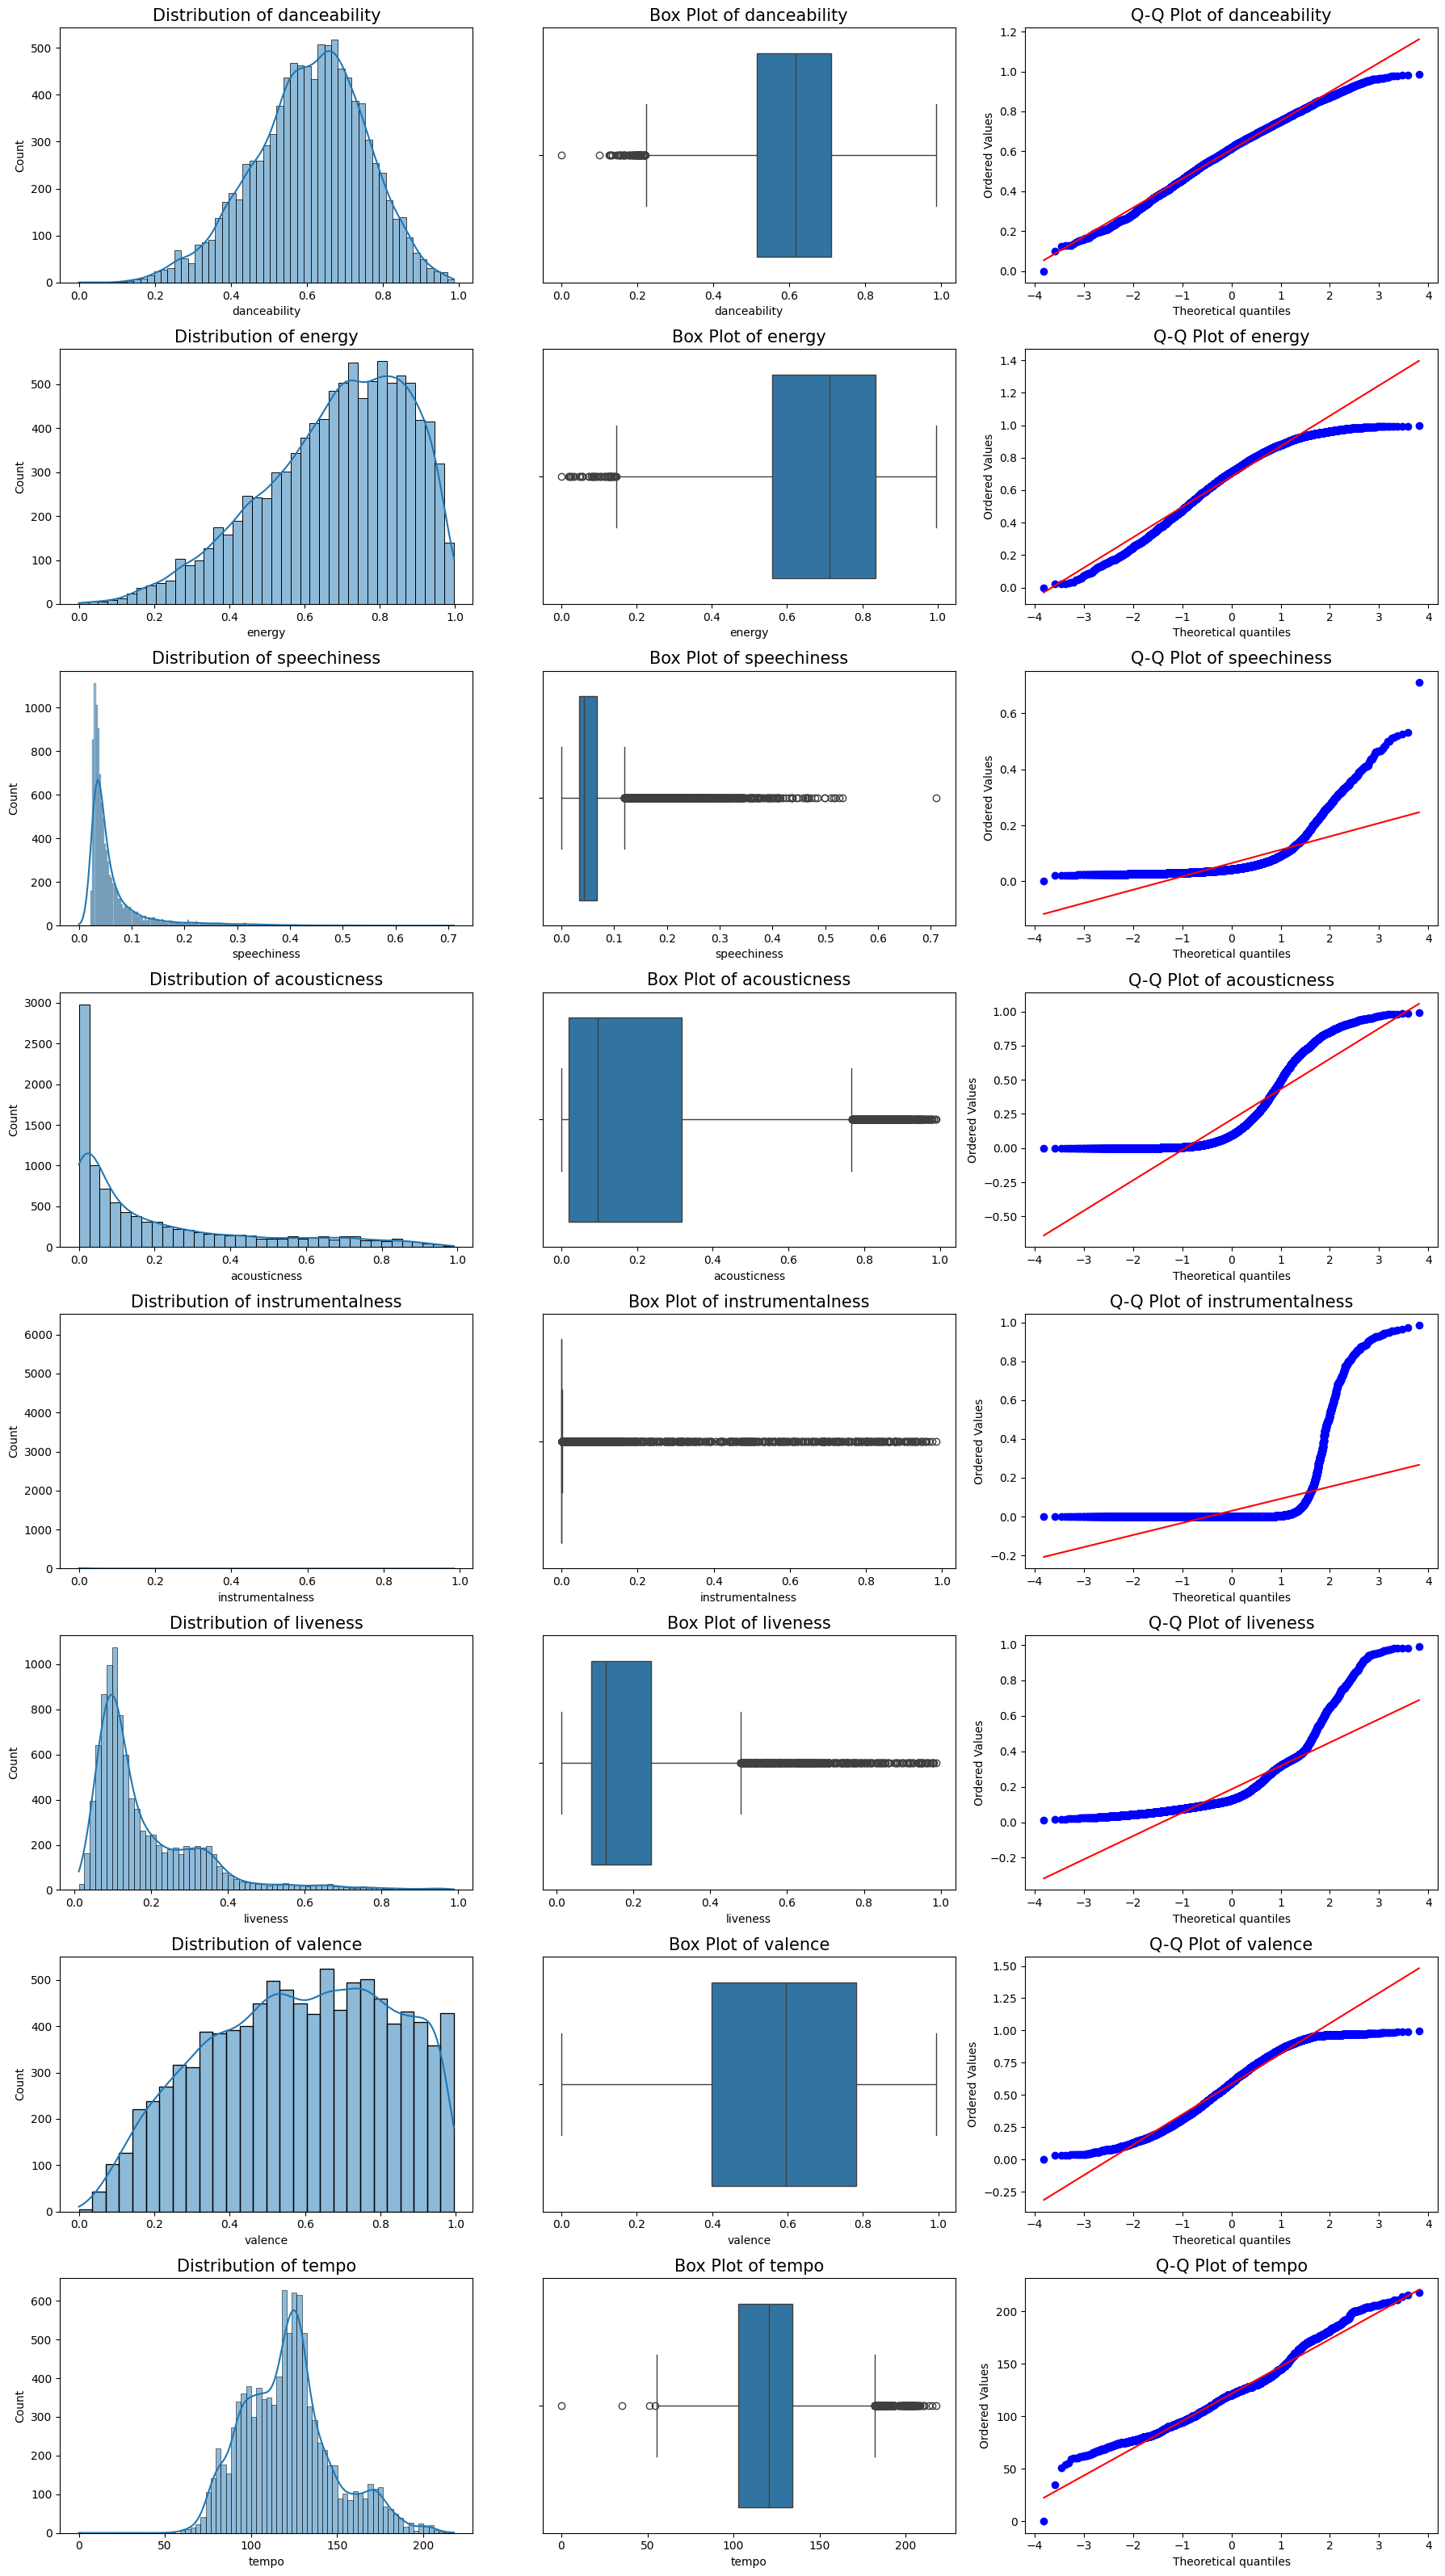

In [10]:
# Plotting distributions of numeric features
utils.plot_numeric_distributions(df_data)

# Scale the data using MinMaxScaler and StandardScaler

In [11]:
# call the scaler
scaler_minmax = MinMaxScaler()
scaler_standardscaler = StandardScaler()

# create our features dataframe
df_features = df_data[['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Scale the data
df_features_minmax_scaled = scaler_minmax.fit_transform(df_features)
df_features_stdscaler_scaled = scaler_standardscaler.fit_transform(df_features)

### Find elbow curve for both scaled dataframes

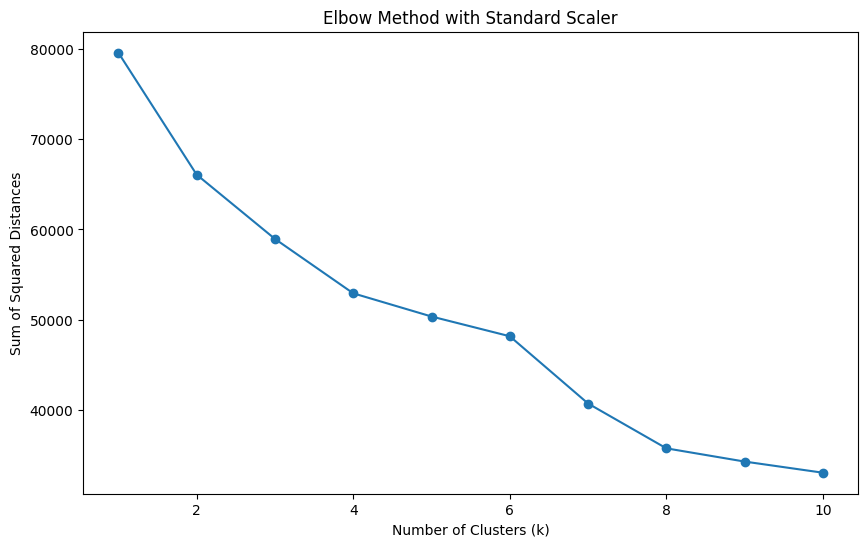

In [12]:
# Create the elbow curve with Standard Scaler
ssd_ss = utils.elbow_method(df_features_stdscaler_scaled, 10, 'Elbow Method with Standard Scaler')


In [13]:
# Calculating the rate of decrease to validate k value
utils.rate_of_decrease(ssd_ss)

Rate of decrease between k=1 and k=2: 13512.420404183824
Rate of decrease between k=2 and k=3: 7120.6765338806
Rate of decrease between k=3 and k=4: 6029.258620014276
Rate of decrease between k=4 and k=5: 2570.0676525142044
Rate of decrease between k=5 and k=6: 2189.6177715859303
Rate of decrease between k=6 and k=7: 7454.230667054988
Rate of decrease between k=7 and k=8: 4965.8096307275555
Rate of decrease between k=8 and k=9: 1467.4044813935689
Rate of decrease between k=9 and k=10: 1235.2108053620395


[13512.420404183824,
 7120.6765338806,
 6029.258620014276,
 2570.0676525142044,
 2189.6177715859303,
 7454.230667054988,
 4965.8096307275555,
 1467.4044813935689,
 1235.2108053620395]

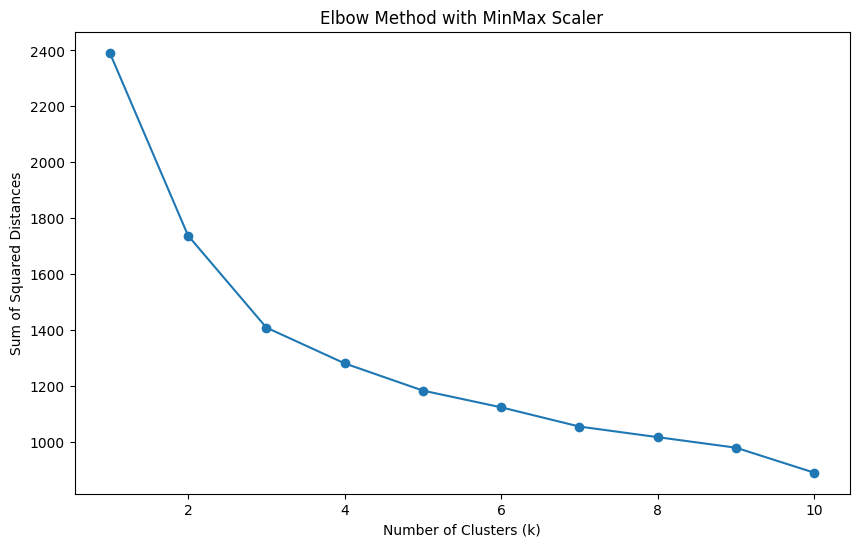

In [14]:
# Create the elbow curve with MinMax Scaler
ssd_mms = utils.elbow_method(df_features_minmax_scaled, 10, 'Elbow Method with MinMax Scaler')


In [15]:
# Calculating the rate of decrease to validate k value
utils.rate_of_decrease(ssd_mms)

Rate of decrease between k=1 and k=2: 654.0775735906766
Rate of decrease between k=2 and k=3: 329.153103640042
Rate of decrease between k=3 and k=4: 128.13496897903997
Rate of decrease between k=4 and k=5: 97.3746154739622
Rate of decrease between k=5 and k=6: 59.89876517051107
Rate of decrease between k=6 and k=7: 68.805877754118
Rate of decrease between k=7 and k=8: 37.965667075010856
Rate of decrease between k=8 and k=9: 37.6697021097134
Rate of decrease between k=9 and k=10: 89.52862838144131


[654.0775735906766,
 329.153103640042,
 128.13496897903997,
 97.3746154739622,
 59.89876517051107,
 68.805877754118,
 37.965667075010856,
 37.6697021097134,
 89.52862838144131]

### Build our scaled dataframe based on MinMaxScaler

In [16]:
# Created a scaled dataframe using the minmax scaler
df_scaled = pd.DataFrame(df_features_minmax_scaled, columns=['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
)
df_scaled['song_id'] = df_scaled.index
df_scaled = df_scaled.set_index('song_id')

df_scaled.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_id,,,,,,,,
0,0.624494,0.874621,0.067511,0.015941,0.113706,0.405322,0.506533,0.511479
1,0.835020,0.745231,0.209564,0.014326,0.000022,0.230297,0.804020,0.583008
2,0.685223,0.666994,0.042897,0.565085,0.000001,0.333675,0.709548,0.344087
3,0.691296,0.730185,0.364276,0.573157,0.000052,0.027021,0.837186,0.345601
4,0.322874,0.628879,0.096624,0.681129,0.000074,0.283521,0.499497,0.393818


### Build our non-scaled dataframe for user interface

In [17]:
# Create a non-scaled dataframe to use with interface
df_non_scaled = df_data[['danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df_non_scaled['song_id'] = df_non_scaled.index
df_non_scaled = df_non_scaled.set_index('song_id')
df_non_scaled.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_id,,,,,,,,
0,0.617,0.872,0.0480,0.0158,0.112000,0.4080,0.504,111.458
1,0.825,0.743,0.1490,0.0142,0.000021,0.2370,0.800,127.045
2,0.677,0.665,0.0305,0.5600,0.000001,0.3380,0.706,74.981
3,0.683,0.728,0.2590,0.5680,0.000051,0.0384,0.833,75.311
4,0.319,0.627,0.0687,0.6750,0.000073,0.2890,0.497,85.818


# Build models

In [18]:
# Create a list to store values and the values of k
score_kmeans = []
score_agglomerative = []
score_gaussian = []

# Create a list to set the range of k values to test
k = list(range(2, 11))

# For each model, we iterate through the different cluster count (`i`). 
# Then, calculate the variance ratio for each algorithm, given that specified cluster count.

for i in k:
    # Kmeans variance and score
    k_model = KMeans(n_clusters=i, n_init='auto')
    k_model.fit(df_scaled)
    k_labels = k_model.labels_
    score = metrics.calinski_harabasz_score(df_scaled, k_labels)    
    score_kmeans.append(score)
    
    # AgglomerativeClustering variance and score
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_model.fit(df_scaled)
    agglo_labels = agglo_model.labels_
    score = metrics.calinski_harabasz_score(df_scaled, agglo_labels)    
    score_agglomerative.append(score)    

    # Gaussian variance and score
    gaussian_model = GaussianMixture(n_components=i)
    gaussian_model.fit(df_scaled)
    gaussian_labels = gaussian_model.predict(df_scaled)
    score = metrics.calinski_harabasz_score(df_scaled, gaussian_labels)    
    score_gaussian.append(score)

In [19]:
# Display the scores.
display(score_kmeans)
display(score_agglomerative)
display(score_gaussian)

[np.float64(3743.6455079965613),
 np.float64(3471.0073440182705),
 np.float64(2770.67979523879),
 np.float64(2539.6882175247783),
 np.float64(2293.5902613925878),
 np.float64(2101.3411065729906),
 np.float64(2109.1009060818674),
 np.float64(1766.7372171113323),
 np.float64(1864.4629304916407)]

[np.float64(2532.9103930395822),
 np.float64(2222.2612246959416),
 np.float64(1886.1592782349683),
 np.float64(1697.1893855521976),
 np.float64(1612.1642723816792),
 np.float64(1564.728881985441),
 np.float64(1518.038647627655),
 np.float64(1440.5786397894144),
 np.float64(1380.6328963247006)]

[np.float64(244.98666106599458),
 np.float64(361.7066494909122),
 np.float64(486.2759917876634),
 np.float64(535.527766842682),
 np.float64(543.827106329495),
 np.float64(484.1954791327696),
 np.float64(565.9998441282042),
 np.float64(409.63849216679034),
 np.float64(351.2829061781985)]

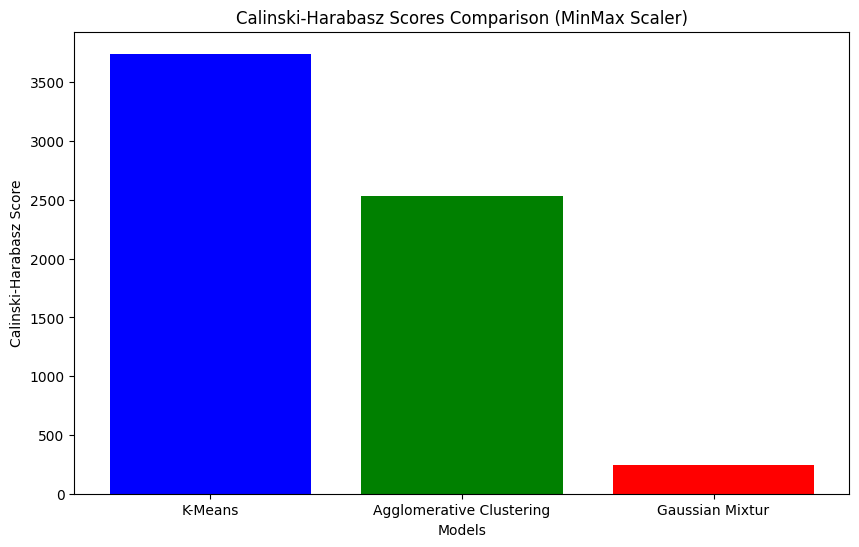

In [20]:
# Visualizing the results for presentation
ch_scores = {
    'K-Means': score_kmeans[0],
    'Agglomerative Clustering': score_agglomerative[0],
    'Gaussian Mixtur': score_gaussian[0]}
# Plot the Calinski-Harabasz scores
plt.figure(figsize=(10, 6))
plt.bar(ch_scores.keys(), ch_scores.values(), color=['blue', 'green', 'red'])
plt.title('Calinski-Harabasz Scores Comparison (MinMax Scaler)')
plt.xlabel('Models')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

## Build k-means model for user interface

In [21]:
# Create a non-scaled dataframe with K-Means cluster labels to be use with user interface
# Create a list to store values and the values of k
score_kmeans2 = []

# Create a list to set the range of k values to test
k = list(range(2, 11))

# Iterate through the different cluster count (`i`). 
for i in k:
    # Kmeans variance
    k2_model = KMeans(n_clusters=i, n_init='auto')
    k2_model.fit(df_non_scaled)

### Export data and models

In [22]:
# save scaled data for interface
df_scaled.to_csv("output/df_scaled.csv")

# save non-scaled data for interface
df_non_scaled.to_csv("output/df_non_scaled.csv")

# Save the models
joblib.dump(k_model, 'output/kmeans_model.pkl')
joblib.dump(agglo_model, 'output/agglo_model.pkl')
joblib.dump(gaussian_model, 'output/gaussian_model.pkl')
joblib.dump(k2_model, 'output/kmeans_nonscale_model.pkl')

['output/kmeans_nonscale_model.pkl']

# Predicting with each model

In [23]:
# Predicting the clusters
kmeans_labels = k_model.predict(df_scaled)
agglo_labels = agglo_model.fit_predict(df_scaled)
gaussian_labels = gaussian_model.predict(df_scaled)
kmeans2_labels = k2_model.predict(df_non_scaled)

# Creating a new dataframe to hold the scaled data
df_scaled_with_labels = df_scaled.copy()
df_non_scaled_with_labels = df_non_scaled.copy()

# Add the labels to the scaled dataframe
df_scaled_with_labels['kmeans_labels'] = kmeans_labels
df_scaled_with_labels['agglo_labels'] = agglo_labels
df_scaled_with_labels['gaussian_labels'] = gaussian_labels
df_non_scaled_with_labels['kmeans_labels'] = kmeans2_labels

display(df_scaled_with_labels.head())
display(df_non_scaled_with_labels.head())

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,kmeans_labels,agglo_labels,gaussian_labels
song_id,,,,,,,,,,,
0,0.624494,0.874621,0.067511,0.015941,0.113706,0.405322,0.506533,0.511479,5,8,2
1,0.835020,0.745231,0.209564,0.014326,0.000022,0.230297,0.804020,0.583008,0,6,9
2,0.685223,0.666994,0.042897,0.565085,0.000001,0.333675,0.709548,0.344087,4,0,8
3,0.691296,0.730185,0.364276,0.573157,0.000052,0.027021,0.837186,0.345601,4,0,5
4,0.322874,0.628879,0.096624,0.681129,0.000074,0.283521,0.499497,0.393818,8,5,8


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,kmeans_labels
song_id,,,,,,,,,
0,0.617,0.872,0.0480,0.0158,0.112000,0.4080,0.504,111.458,5
1,0.825,0.743,0.1490,0.0142,0.000021,0.2370,0.800,127.045,2
2,0.677,0.665,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4
3,0.683,0.728,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4
4,0.319,0.627,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4


### Export data with cluster labels

In [24]:
# Save the labels to a CSV
df_scaled_with_labels.to_csv('output/df_scaled_with_labels.csv')
df_non_scaled_with_labels.to_csv('output/df_non_scaled_with_labels.csv')

# Save the cleaned data with labels for interface
df_data_with_labels = df_data.copy()
df_data2_with_labels = df_data.copy()

# Add the labels to the cleaned dataframe for interface
df_data_with_labels['kmeans_labels'] = kmeans_labels
df_data_with_labels['agglo_labels'] = agglo_labels
df_data_with_labels['gaussian_labels'] = gaussian_labels

# Add the labels to the cleaned dataframe based on non-scaled values for interface
df_data2_with_labels['kmeans_labels'] = kmeans2_labels

# Save the cleaned data with labels for interface to csv
df_data_with_labels.to_csv('output/df_cleaned_with_labels.csv')
df_data2_with_labels.to_csv('output/df_cleaned2_with_labels.csv')

# PCA Evaluation

In [25]:
# Create a PCA object
pca = PCA(n_components=2)
# Fit and Transform the scaled data
pca_data = pca.fit_transform(df_scaled[['danceability', 'energy', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])
# Create a dataframe for the PCA data
df_pca = pd.DataFrame(pca_data, columns=['pca1', 'pca2'])
df_pca = pd.concat([df_scaled_with_labels, df_pca], axis=1)

# Add the song_id to the PCA dataframe
df_pca['song_id'] = df_scaled.index
df_pca = df_pca.set_index('song_id')

df_pca.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,kmeans_labels,agglo_labels,gaussian_labels,pca1,pca2
song_id,,,,,,,,,,,,,
0,0.624494,0.874621,0.067511,0.015941,0.113706,0.405322,0.506533,0.511479,5,8,2,-0.204391,-0.189888
1,0.835020,0.745231,0.209564,0.014326,0.000022,0.230297,0.804020,0.583008,0,6,9,-0.317160,0.127407
2,0.685223,0.666994,0.042897,0.565085,0.000001,0.333675,0.709548,0.344087,4,0,8,0.197777,0.300076
3,0.691296,0.730185,0.364276,0.573157,0.000052,0.027021,0.837186,0.345601,4,0,5,0.110547,0.404543
4,0.322874,0.628879,0.096624,0.681129,0.000074,0.283521,0.499497,0.393818,8,5,8,0.461637,0.093936


In [26]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.38661531, 0.23041738])

In [27]:
# Save the PCA dataframe to a CSV
df_pca.to_csv('output/df_pca.csv')

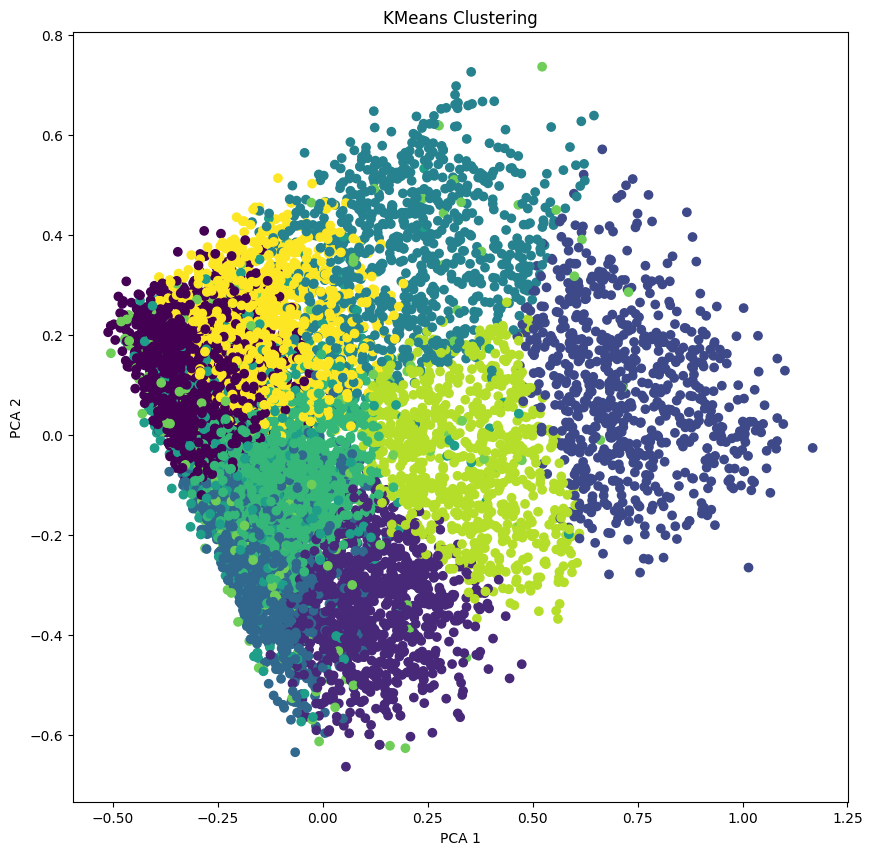

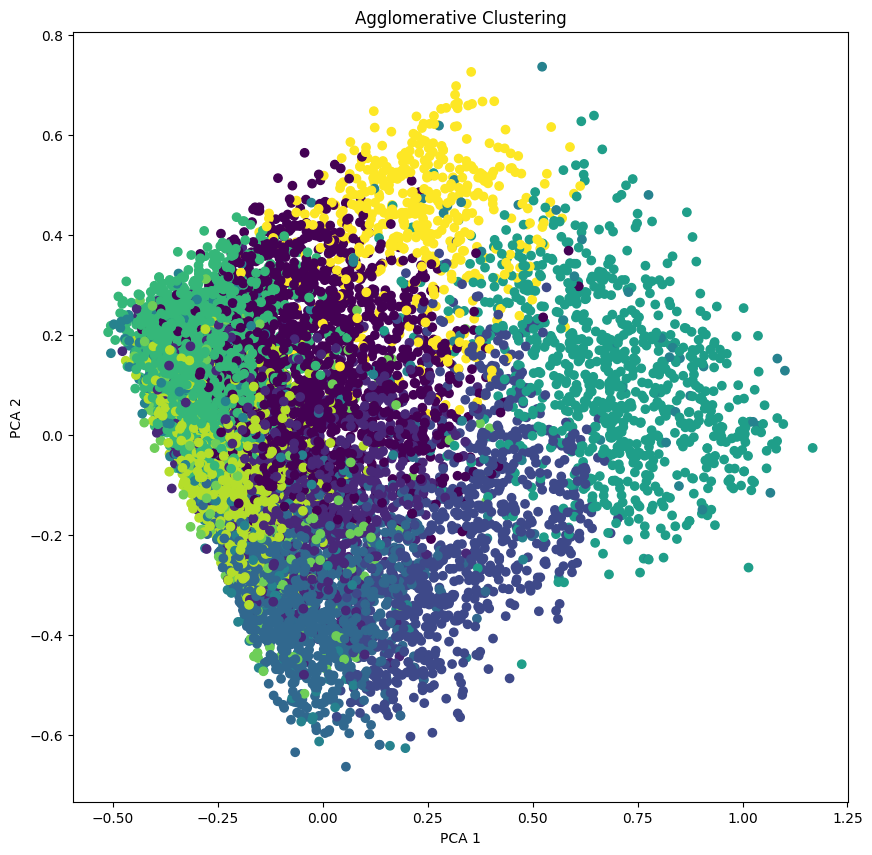

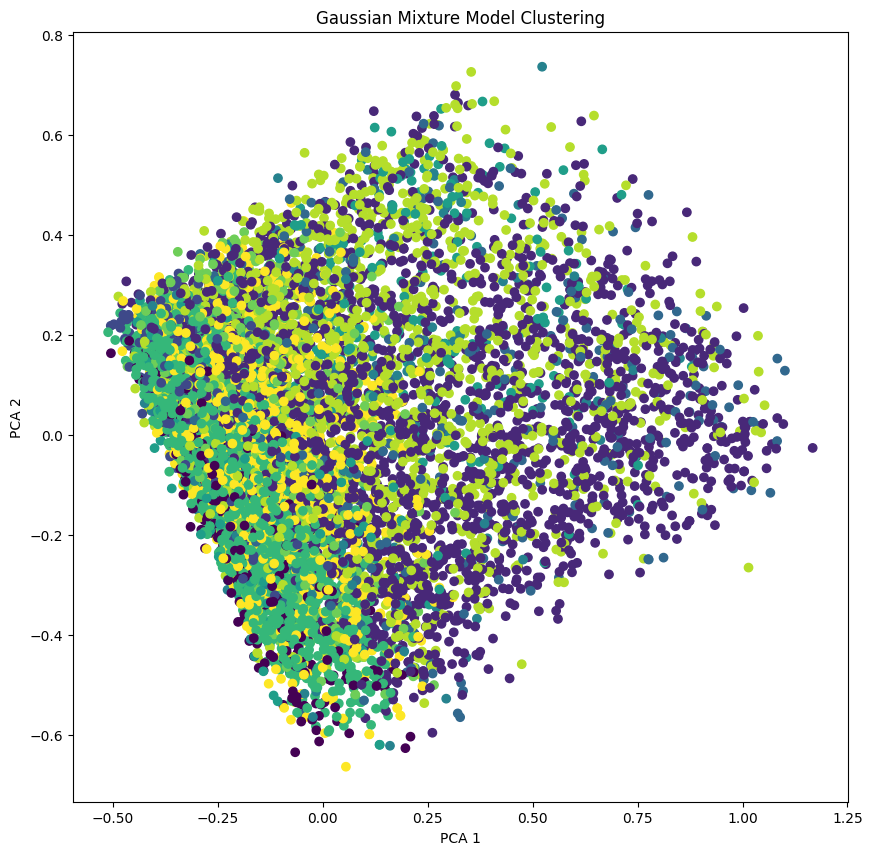

In [28]:
utils.plot_2_clusters(df_pca, "kmeans")
utils.plot_2_clusters(df_pca, "agglo")
utils.plot_2_clusters(df_pca, "gaussian")

In [29]:
# Use the columns from the scaled and encoded DataFrame in step 2.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=df_scaled.columns)
pca_component_weights

,PCA1,PCA2
danceability,-0.197916,0.263513
energy,-0.510222,-0.149493
speechiness,-0.043555,-0.004259
acousticness,0.699329,0.488301
instrumentalness,-0.016356,-0.005184
liveness,-0.040144,-0.017955
valence,-0.451684,0.817133
tempo,-0.060391,-0.041241


<Axes: xlabel='acousticness', ylabel='valence'>

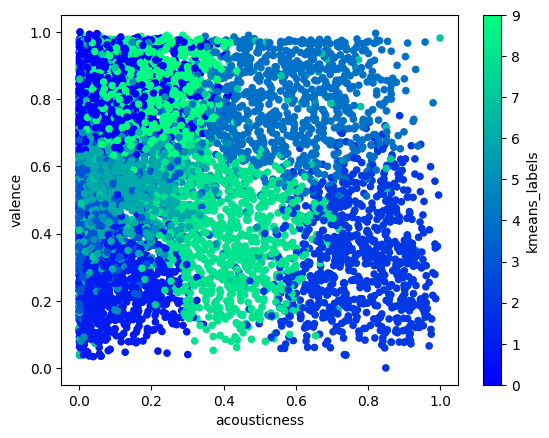

In [30]:
# Plot the features that have the strongest influence on each component. 
df_scaled_with_labels.plot.scatter(
    x="acousticness",
    y="valence",
    c="kmeans_labels",
    colormap='winter')

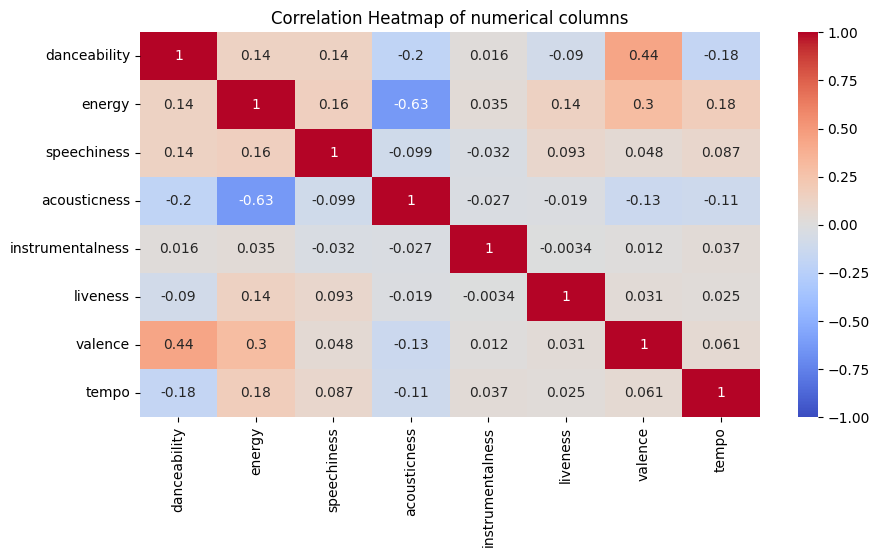

In [31]:
# Correlation Matrix is helful to determine if PCA is needed
utils.plot_correlation_heatmap(df_data)

<Axes: xlabel='acousticness', ylabel='energy'>

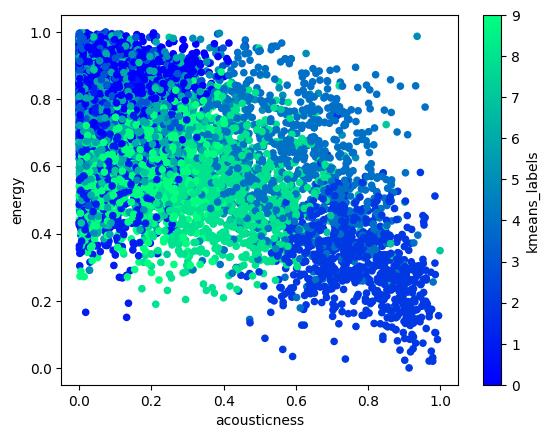

In [32]:
# Plot the features that have the strongest influence on each component. 
df_scaled_with_labels.plot.scatter(
    x="acousticness",
    y="energy",
    c="kmeans_labels",
    colormap='winter')

<Axes: xlabel='valence', ylabel='danceability'>

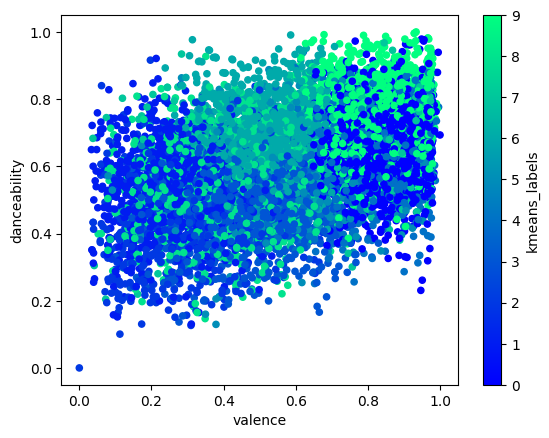

In [33]:
# Plot the features that have the strongest influence on each component. 
df_scaled_with_labels.plot.scatter(
    x="valence",
    y="danceability",
    c="kmeans_labels",
    colormap='winter')